## CSCE 5218 / CSCE 4930 Deep Learning
## HW1a The Perceptron

# Downloading the datasets

In [1]:
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat

--2023-02-14 22:15:50--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat’

train.dat           100%[===================>]  10.98K  --.-KB/s    in 0s      

2023-02-14 22:15:50 (152 MB/s) - ‘train.dat’ saved [11244/11244]

--2023-02-14 22:15:50--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat’

test.dat            100%[===================>]   2.78K  --.-KB/s    in 0s      

2023-02-14 22:15:51 (328 MB/s) - ‘test.dat’ saved [2844/2844]



In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


**Initializing Libraries**

In [3]:
import math
import itertools
import re

**Reading the Data files**

In [4]:
# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')
    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
        #print(instance)
    return data

**Define the dot product function**

In [5]:
def dot_product(array1, array2):
    # You do not to write code like this, but get used to it
    return sum([w * x for w, x in zip(array1, array2)])

**Define the sigmoid**

In [6]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

**Accuracy = percent of correct predictions**

In [7]:
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)

**Predict a new instance; this is the definition of the perceptron**

In [8]:
def predict(weights, instance):
    if sigmoid(dot_product(weights, instance)) >= 0.5:
        return 1
    return 0

**Comment the training function**

In [12]:
# Train a perceptron with instances
#   and hyperparameters lr (leearning rate) and epochs
# The implementation comes from the definition of the perceptron
# Training consists on fitting the parameters
#   The parameters are the weights, that's the only thing training is responsible to fit
#     (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#   Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
#   so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs): #Defining a function name with train_perceptron
    weights = [0] * (len(instances[0])-1)    #Initializing all the weights with zeros
    # weights = [0, 0, 0, ...,  0]

    while epochs > 0:                                       #If number of epochs are greater than zero
        for instance in instances:
            in_value = dot_product(weights, instance)       #calling the function dot product
            output = sigmoid(in_value)                      #Calling the activation function(sigmoid)
            error = instance[-1] - output
            for i in range(0, len(weights)):                                    #Creating a loop to update the weight values
                weights[i] += lr * error * output * (1-output) * instance[i]    #Updating the weight values

        epochs -= 1                                                             #After every loop, the number of epoches gets reduces
        if epochs == 0:                                                         #If number of epochs equal to zero
            break                                                               #Then the loop gets break

    return weights                                                              #Returning the updated weight values

In [10]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")


**Run It**

In [11]:
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions Answer the following questions.Include your implementation and the output for each question.##

Question 1
# In train_perceptron(instances, lr, epochs), we have the following code:#
TODO Add your answer here (text only)

In [12]:
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output

# Why don't we have the following code snippet instead?#

In [12]:
output = predict(weights, instance)
error = instance[-1] - output

**Answer**

# When employed to introduce non-linearity to a machine learning model, the sigmoid function serves as an activation function in the field of artificial intelligence. To put it simply, the function chooses which values to pass as output and which ones not to.In contrast to a neuron-based model seen in human brains, the activation function determines what signals should be sent to the following neuron at the very end.

## Hence without activation function neural network doesn't learn anything.

# Question 2 #

# Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.#

In [13]:
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate

In [16]:
Accuracies=[]
for x in range(len(tr_percent)):
  data=int(float(tr_percent[x])*0.01*400)
  training=instances_tr[0:data]
  for y in range(len(num_epochs)):
    epochs=num_epochs[y]
    for z in range(len(lr)):
      lr1=lr[z]
      weights = train_perceptron(training, lr1, epochs)
      accuracy = get_accuracy(weights, instances_te)
      Accuracies.append(accuracy)
      print(f"#tr: {len(training):3}, epochs: {epochs:3}, learning rate: {lr1:.3f}; "f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs

In [15]:

import matplotlib.pyplot as plt
import numpy as np

# Question 3. Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following: #

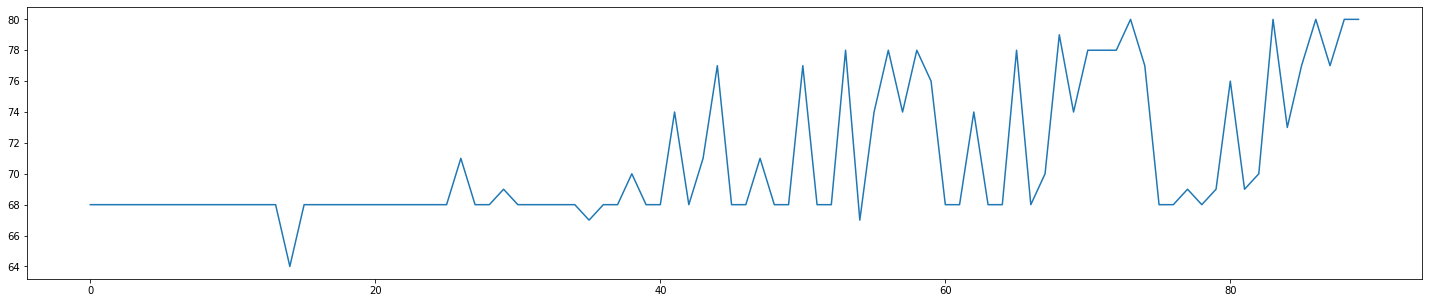

In [96]:
plt.rcParams['figure.figsize'] = [25, 5]
i = np.array([1, 90])

plt.plot(Accuracies)
plt.show()

# **From the above figure it is clear that with the combination of distinct parameters,that too the parameters with the maximum values,it predicts the high accuracy. From the outcome of 16th shell it is clear that when the training set of the dataset is only 5% of the data, there is no effect of hyperparameters but there is small hike in accuracy with the learning rate of 0.05, and then for every combination with epochs=100 and learning rate=0.05 there is a maximum outcome. Yet,there are also instances where the accuracy decreases with the increase in learning rate,presumably the reason is that it could miss the local minima**

# A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?#

## It can be infer from the following code that, even with the dataset of 75% and learning rate =0.01, it gives the maximum accuracy, hence it is not necessary to have 100% data

In [29]:
tr_percent = [ 75] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [ 0.01]              # learning rate

In [30]:
Accuracies=[]
for x in range(len(tr_percent)):
  data=int(float(tr_percent[x])*0.01*400)
  training=instances_tr[0:data]
  for y in range(len(num_epochs)):
    epochs=num_epochs[y]
    for z in range(len(lr)):
      lr1=lr[z]
      weights = train_perceptron(training, lr1, epochs)
      accuracy = get_accuracy(weights, instances_te)
      Accuracies.append(accuracy)

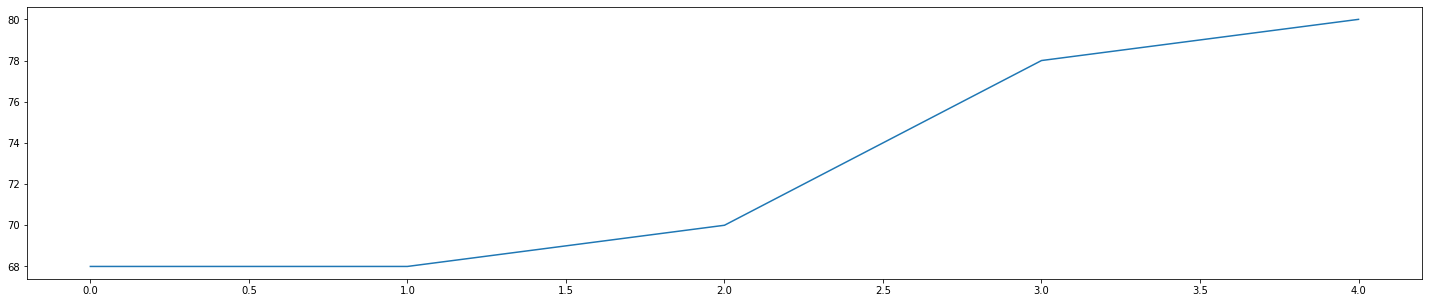

In [31]:
plt.rcParams['figure.figsize'] = [25, 5]
i = np.array([1, 90])

plt.plot(Accuracies)
plt.show()

In [130]:
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate

## B How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?##

# tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
# tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0

# When the learning rate is too small there is chance that vanishing gradient problem may encounter which makes the algorithm to not to learn anything and there by decreases the accuracy, in other words very small learning rate leads to very much time to converge, and there is chance that it leads to vanish gradient which reduces the accuracy.

# C. Can you get higher accuracy with additional hyperparameters (higher than 80.0)?#

# ** Yes, it is possible, as we increase the number of hidden layers, presumably we can expect accuracy more than 80%**

# D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)? #

In [59]:
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [ 100]              # number of epochs
lr = [0.005]              # learning rate

In [60]:
Accuracies=[]
for x in range(len(tr_percent)):
  data=int(float(tr_percent[x])*0.01*400)
  training=instances_tr[0:data]
  for y in range(len(num_epochs)):
    epochs=num_epochs[y]
    for z in range(len(lr)):
      lr1=lr[z]
      weights = train_perceptron(training, lr1, epochs)
      accuracy = get_accuracy(weights, instances_te)
      Accuracies.append(accuracy)

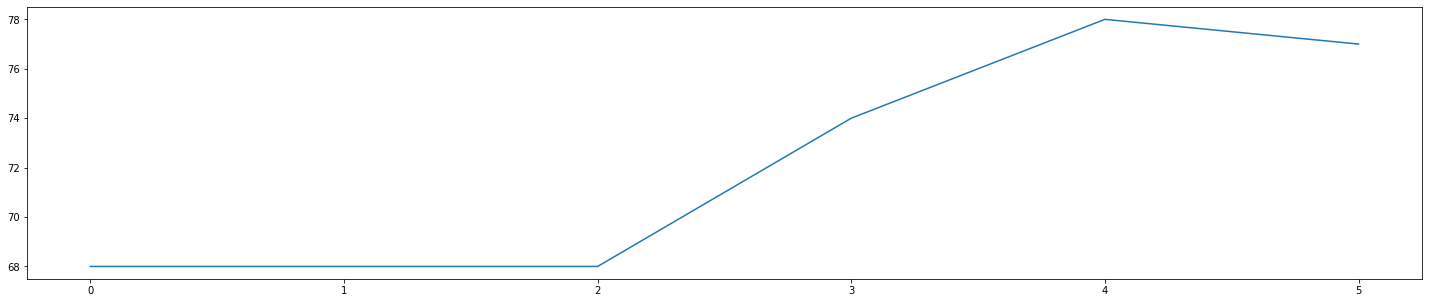

In [61]:
plt.rcParams['figure.figsize'] = [25, 5]
i = np.array([1, 90])

plt.plot(Accuracies)
plt.show()

**We cannot expect high accuracy with the number of epochs, as we increase the number of epochs there may be a chance of overfitting, which leads to reduction in accuracy**